In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.1 Load the Data

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/output.csv')

Display the first 5 rows of the DataFrame

In [3]:
print(df.head(5))

   Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0       1   M     43.2555       30.8421      25.9025   6.3     Yes
1       2   F     45.6033       28.1900      26.2067  13.5      No
2       3  F      45.0107       28.9677      26.0215  11.7      No
3       4   F     44.5398       28.9899      26.4703  13.5      No
4       5  M      43.2870       30.6972      26.0158  12.4      No


Data Exploration

In [5]:
# Data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB
None


Data Describe

In [6]:
print(df.describe())

           Number  %Red Pixel  %Green pixel  %Blue pixel          Hb
count  104.000000  104.000000    104.000000   104.000000  104.000000
mean    52.500000   45.654175     28.875507    25.470325   12.150962
std     30.166206    2.816294      1.554275     1.984671    2.512957
min      1.000000   38.796800     25.140300    19.541300    2.800000
25%     26.750000   43.911375     27.871300    24.896425   10.650000
50%     52.500000   45.385350     28.948750    25.953200   12.600000
75%     78.250000   46.968325     29.887275    26.721600   14.000000
max    104.000000   54.647800     32.368100    29.841400   16.300000


In [ ]:
Feature Engineering

In [7]:
from sklearn.model_selection import train_test_split

# Encode categorical variables
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df['Anaemic'] = df['Anaemic'].map({'No': 0, 'Yes': 1})

# Features and target
X = df[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]
y = df['Anaemic']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

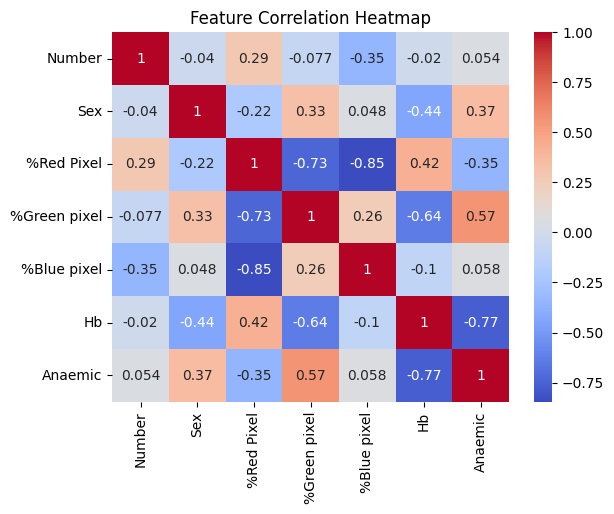

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Model Training

## Bagging Approach: Random Forest

Random Forest Accuracy: 1.0
Random Forest - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



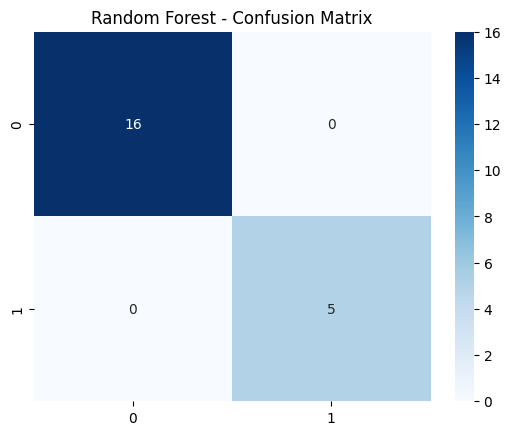

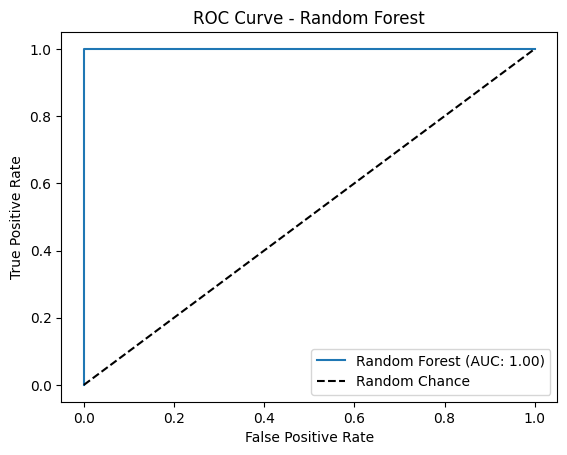

In [10]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc # Import classification_report here

#Random Forest Classifier Initialization
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#Training the Model
rf_model.fit(X_train, y_train)
#Making Predictions
rf_pred = rf_model.predict(X_test)
#Evaluating the Model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
# Classification Report
print("Random Forest - Classification Report")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
# Calculate predicted probabilities
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)
plt.plot(fpr, tpr, label=f"Random Forest (AUC: {auc(fpr, tpr):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


## Boosting Approach: Gradient Boosting

Gradient Boosting Accuracy: 1.0


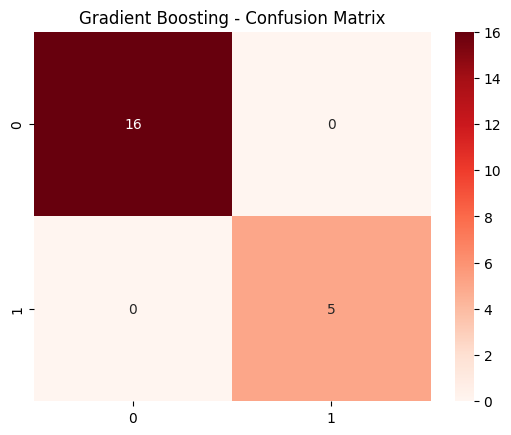

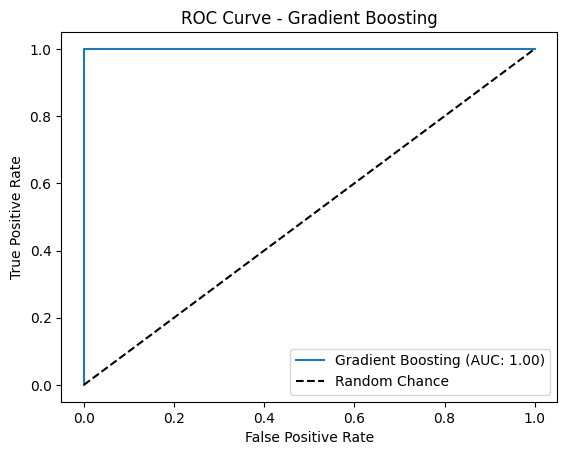

In [12]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc # Import roc_curve and auc
import seaborn as sns # Import seaborn
import matplotlib.pyplot as plt # Import matplotlib.pyplot

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

# Confusion Matrix
# Changed cmap to 'Reds' and using gb_pred instead of xgb_pred
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Gradient Boosting - Confusion Matrix") # Changed title
plt.show()


# ROC Curve
# Calculate predicted probabilities for Gradient Boosting
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, gb_pred_proba)  # Use gb_pred_proba
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC: {auc(fpr, tpr):.2f})")  # Update label
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")  # Update title
plt.legend()
plt.show()

## Stacking Approach

In [13]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Base models
# Model 1: Decision Tree Classifier
# Model 2: Support Vector Classifier
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('svc', SVC(probability=True, kernel='linear', random_state=42))
]

# Meta-model
# Logistic Regression is chosen for simplicity and interpretability
meta_model = LogisticRegression()

# Stacking Classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Training the stacking classifier
stack_model.fit(X_train, y_train)

# Predictions on the test set
stack_pred = stack_model.predict(X_test)

# Evaluation
print("Stacking - Classification Report")
print(classification_report(y_test, stack_pred))

# Print overall accuracy
accuracy = accuracy_score(y_test, stack_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.2f}")


Stacking - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Stacking Classifier Accuracy: 1.00


# **- Combine multiple classifiers by voting.**

In [14]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Base models for voting
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
svc = SVC(probability=True, random_state=42)

# Hard Voting Classifier
hard_vote_model = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('svc', svc)
    ],
    voting='hard'
)

# Soft Voting Classifier
soft_vote_model = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('svc', svc)
    ],
    voting='soft'
)

# Train and evaluate hard voting classifier
hard_vote_model.fit(X_train, y_train)
hard_vote_pred = hard_vote_model.predict(X_test)
print("Hard Voting Classifier")
print("Accuracy:", accuracy_score(y_test, hard_vote_pred))
print(classification_report(y_test, hard_vote_pred))

# Train and evaluate soft voting classifier
soft_vote_model.fit(X_train, y_train)
soft_vote_pred = soft_vote_model.predict(X_test)
print("\nSoft Voting Classifier")
print("Accuracy:", accuracy_score(y_test, soft_vote_pred))
print(classification_report(y_test, soft_vote_pred))


Hard Voting Classifier
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21


Soft Voting Classifier
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



## Evaluation
- Compare the performance of all models.


In [15]:
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting:", accuracy_score(y_test, gb_pred))
print("Stacking Model:", accuracy_score(y_test, stack_pred))
print("Voting Classifier:", accuracy_score(y_test, hard_vote_pred))

Random Forest: 1.0
Gradient Boosting: 1.0
Stacking Model: 1.0
Voting Classifier: 1.0


# Cross-Validation Performance Comparison

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        final_estimator=LogisticRegression()
    ),
    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        voting='soft'
    )
}

# Perform cross-validation and store results
# Assuming X and y are already defined as feature matrix and target variable
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Changed `data_X` to `X`
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Random Forest Cross-Validation Accuracy: 0.9705 ± 0.0398
Gradient Boosting Cross-Validation Accuracy: 0.9319 ± 0.0508
Stacking Cross-Validation Accuracy: 0.9705 ± 0.0398
Voting Cross-Validation Accuracy: 0.9610 ± 0.0372


##  Visualizing Cross-Validation Results

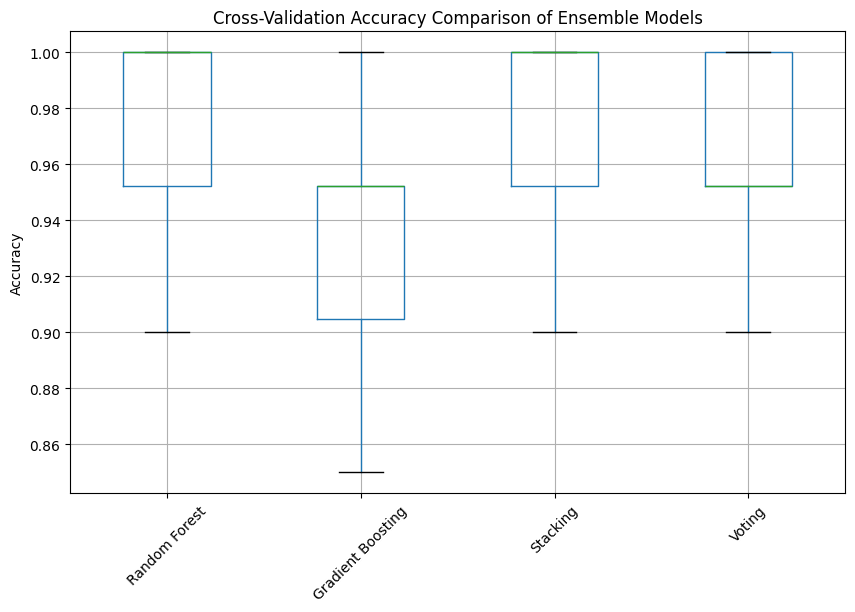

In [17]:
import matplotlib.pyplot as plt

# Prepare results for visualization
import pandas as pd

#converted into a pandas DataFrame (results_df).
#This allows for easier manipulation and visualization.
results_df = pd.DataFrame(results)

# Plot box plot for model comparison
plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Cross-Validation Accuracy Comparison of Ensemble Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


## Confusion Matrix for Each Model

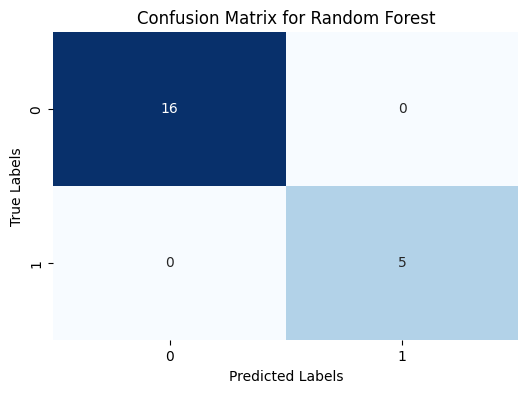

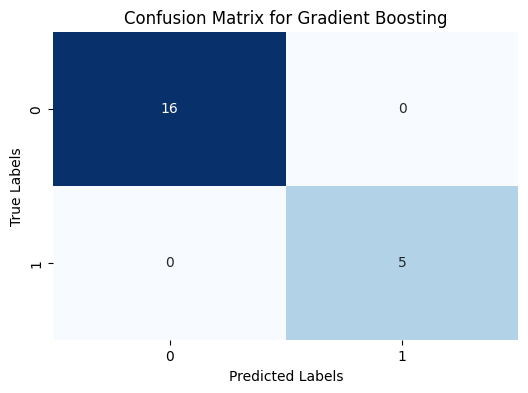

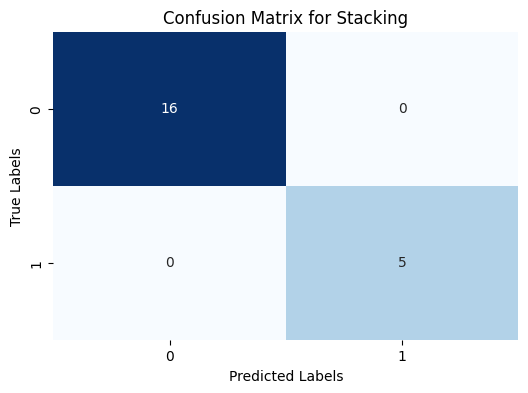

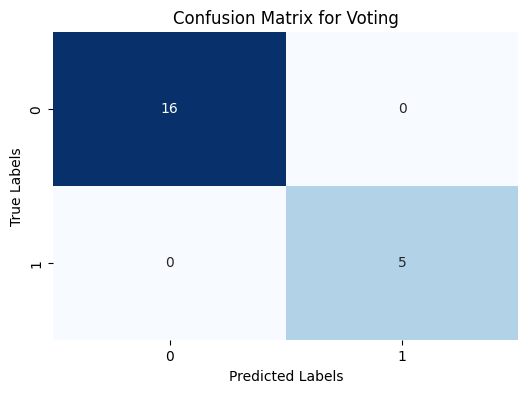

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit each model on the training data and plot the confusion matrix for each
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

Random Forest - Mean CV Accuracy: 0.9705
Gradient Boosting - Mean CV Accuracy: 0.9319
Stacking - Mean CV Accuracy: 0.9414
Voting - Mean CV Accuracy: 0.9514


<ipython-input-23-40bbad6feb15>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette='viridis')


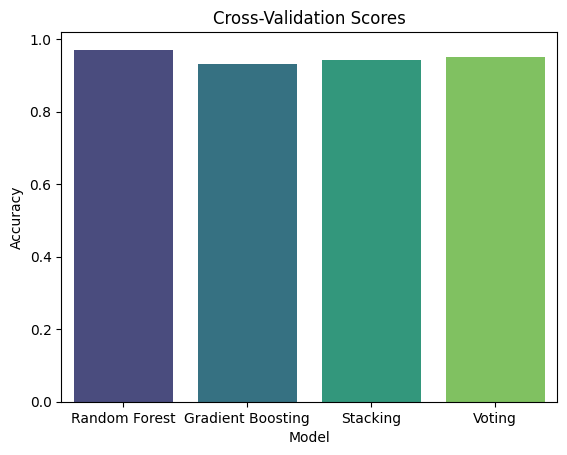

In [23]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for all models
# Changed 'voting_model' to 'model', as it seems to be the correct variable name
models = {'Random Forest': rf_model, 'Gradient Boosting': gb_model, 'Stacking': stack_model, 'Voting': model}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()
    print(f"{name} - Mean CV Accuracy: {scores.mean():.4f}")

# Bar Plot of CV Scores
sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette='viridis')
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

## Precision and Recall for Each Model

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit each model on the training data and calculate precision, recall, and F1-score
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the metrics
    print(f"{model_name} Performance Metrics:")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1 Score: {f1:.4f}\n")


Random Forest Performance Metrics:
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000

Gradient Boosting Performance Metrics:
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000

Stacking Performance Metrics:
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000

Voting Performance Metrics:
 - Precision: 1.0000
 - Recall: 1.0000
 - F1 Score: 1.0000



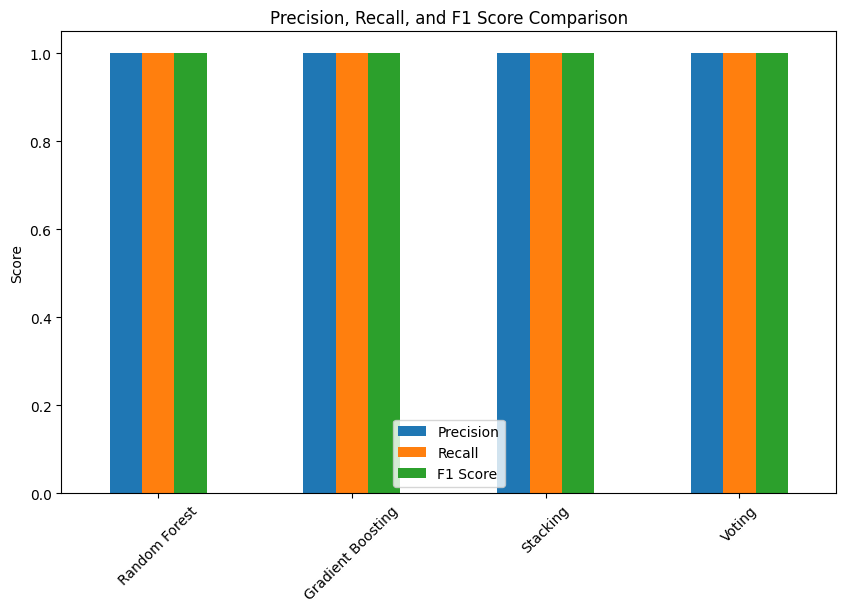

In [25]:
import matplotlib.pyplot as plt

# Grouped bar chart with custom colors
metrics_df.plot(
    kind='bar',
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom colors for Precision, Recall, F1 Score
)
plt.title("Precision, Recall, and F1 Score Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()


## Summary of Metrics

In [20]:
# Collect all metrics in a DataFrame for summary
metrics_summary = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics_summary)

# Display the summary
print("Model Performance Summary:")
metrics_df

Model Performance Summary:


Model  Accuracy  Precision  Recall  F1 Score
0      Random Forest       1.0        1.0     1.0       1.0
1  Gradient Boosting       1.0        1.0     1.0       1.0
2           Stacking       1.0        1.0     1.0       1.0
3             Voting       1.0        1.0     1.0       1.0

# Explainable AI (XAI)

In [ ]:
import shap

# Use a subset of the data for SHAP to reduce computation time

#This code uses SHAP to explain the predictions of the Random Forest model
#on a subset of the test data.
# The original code tried to sample 100 rows, but X_test only has 21.
# Changed to sample a maximum of 21 rows or the entire dataset if it's smaller.
sample_size = min(21, len(X_test))
X_sample = X_test.sample(sample_size, random_state=42)


# Initialize SHAP explainer for the Random Forest model

#This initializes a TreeExplainer for the Random Forest model. The TreeExplainer is efficient
#for tree-based models (like Random Forest) and computes SHAP values to explain the output of
#individual predictions.
explainer = shap.TreeExplainer(models["Random Forest"])

#This computes the SHAP values for each feature in the sample data.
#The SHAP values represent how much each feature contributes to the difference between the prediction
#and the expected output (mean prediction).
shap_values = explainer.shap_values(X_sample)

# **illustrates the feature importance in terms of the average impact each feature has on the model's predictions**

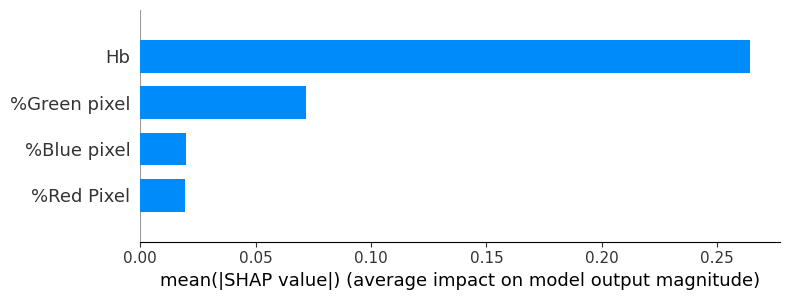

In [ ]:
import numpy as np

# Calculate mean absolute SHAP values across all classes for each feature

#This step calculates the mean absolute SHAP value for each feature.

#The shap_values array contains the SHAP values for all instances in X_sample,
#and by taking the absolute value and averaging across all instances, we get
#an overall measure of each feature's contribution to the model's predictions.

mean_shap_values = np.mean([np.abs(sv) for sv in shap_values], axis=0)  # Resulting shape should be (100, 12) to match X_sample

# If mean_shap_values is (12, 5), take the mean across classes, resulting in a vector (12, )

#If there are multiple classes (for multi-class classification), this line computes the mean
#SHAP value across all classes, collapsing the results to a single value for each feature.

mean_shap_values = np.mean(mean_shap_values, axis=1)



# Repeat this vector to create a matrix that matches X_sample's shape

#This step repeats the mean_shap_values for each row in the sample data.
#This is necessary to create a shape that matches the original X_sample for visualization.
mean_shap_values_repeated = np.tile(mean_shap_values, (X_sample.shape[0], 1))


# Plot the summary plot with the repeated matrix
shap.summary_plot(mean_shap_values_repeated, X_sample, plot_type="bar", feature_names=X_sample.columns)

## Explaining Model Predictions Using LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=60242e8936b53b8681ab67c560cabc7c2d9031c7c9bd338d617ce7287d80589b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# **LIME's LimeTabularExplainer provides a simple way to explain individual predictions of a model by approximating it locally with an interpretable model, highlighting the most influential features for that prediction.**

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
# Assuming X_train contains the correct feature names in its columns
lime_explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=y.values, mode='classification')

# Choose a sample from the test set to explain
sample_index = 0 # Adjust to analyze a different sample

#Generate the Explanation
#This generates a local explanation for the chosen test instance using the Random Forest model’s predicted probabilities

exp = lime_explainer.explain_instance(X_test.values[sample_index], models["Random Forest"].predict_proba, num_features=10)
print(X_test.values[sample_index])
# Display the explanation
exp.show_in_notebook()
exp.show_in_notebook(show_table=True, show_all=False)

[44.2572 29.6578 26.085  12.9   ]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Choose a valid sample index
sample_index = 6  # Replace with a valid index, or use np.random.randint(0, len(X_test))

# Ensure feature_names and class_names are valid strings
# Assuming X_train contains the correct column names
feature_names = list(X_train.columns)  # Get column names from X_train

# Ensure that class names in LIME are ordered the same way as the model output
class_names = [str(cls) for cls in sorted(y.unique())]  # Sorting the class labels to ensure correct order

# Initialize the LIME explainer with the corrected class names
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

# Generate the explanation again
exp = lime_explainer.explain_instance(
    X_test.values[sample_index],
    models["Random Forest"].predict_proba,
    num_features=10
)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# Print the selected sample's feature values
print("\n\nFeature values of the selected sample:")
print(X_test.values[sample_index])

# Get the actual class of the selected sample
actual_class = y_test.values[sample_index]
print(f"Actual class: {actual_class}")

# Get the predicted class of the selected sample
predicted_class = models["Random Forest"].predict(X_test.values[sample_index].reshape(1, -1))[0]
print(f"Predicted class: {predicted_class}")

# Get the predicted probabilities of the selected sample
predicted_probabilities = models["Random Forest"].predict_proba(X_test.values[sample_index].reshape(1, -1))[0]
print(f"Predicted probabilities: {predicted_probabilities}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Feature values of the selected sample:
[43.1425 30.289  26.5686  9.5   ]
Actual class: 1
Predicted class: 1
Predicted probabilities: [0. 1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
